In [1]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn; 
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation); 
#                  https://docs.python.org/3.7/ (Recommended version – 3.7). 
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html 

# Load Module ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns 
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific 
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived 
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, 
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, 
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/ 
#     Docs: https://pandas.pydata.org/docs/ 
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html 
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide 

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a 
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.8.16
numpy version: 1.21.6
pandas version:  1.3.5
seaborn version: 0.11.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>


k-means

In [2]:
# make sample data for clustering 
C1=np.random.normal(loc=0,scale=0.5,size=10_000*2).reshape(-1,2)# 10,000 points
C2=np.random.normal(loc=3,scale=0.5,size=7_000*2).reshape(-1,2)# 7,000 points
C3=np.random.normal(loc=-2,scale=0.5,size=5_000*2).reshape(-1,2)# 5,000 points 

# see shape of data 
C1.shape,C2.shape,C3.shape

((10000, 2), (7000, 2), (5000, 2))

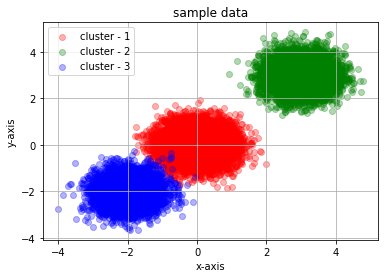

In [3]:
# make plot data 
plt.scatter(C1[:,0],C1[:,1],color='r',alpha=0.3,label='cluster - 1')# plot cluster - 1
plt.scatter(C2[:,0],C2[:,1],color='g',alpha=0.3,label='cluster - 2')# plot cluster - 2
plt.scatter(C3[:,0],C3[:,1],color='b',alpha=0.3,label='cluster - 3')# plot cluster - 3
plt.grid(),plt.xlabel('x-axis'),plt.ylabel('y-axis'),plt.title('sample data')
plt.legend()                            # create space for plot 
plt.show()                              # make show

In [4]:
# make data concatinate 
X=np.concatenate((C1,C2,C3),axis=0)
np.random.shuffle(X)                    # mix data (random shuffle each row)
# see final shape
X.shape

(22000, 2)

In [5]:
# load model 
from sklearn.cluster import KMeans 

# make model (object)
clusterer=KMeans(n_clusters=3)
# make model train 
clusterer.fit(X)
# see labels info 
print('Total labels:',len(clusterer.labels_))
print('Total unique labels:',set(clusterer.labels_))

Total labels: 22000
Total unique labels: {0, 1, 2}


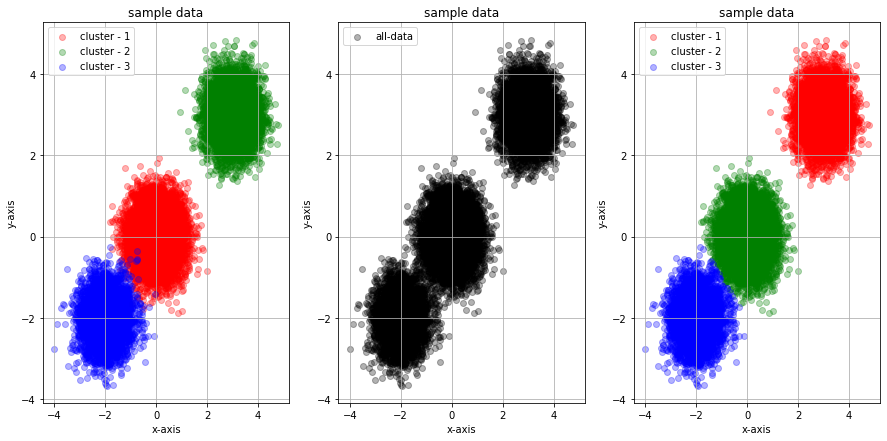

In [6]:
# make figure
plt.figure(figsize=(15,7))
# make subplot - 1 (orginal data)
plt.subplot(1,3,1)                      # make subplot 
plt.scatter(C1[:,0],C1[:,1],color='r',alpha=0.3,label='cluster - 1')# plot cluster - 1
plt.scatter(C2[:,0],C2[:,1],color='g',alpha=0.3,label='cluster - 2')# plot cluster - 2
plt.scatter(C3[:,0],C3[:,1],color='b',alpha=0.3,label='cluster - 3')# plot cluster - 3
plt.grid(),plt.xlabel('x-axis'),plt.ylabel('y-axis'),plt.title('sample data')
plt.legend()                            # create space for plot
# make subplot - 2 (X)
plt.subplot(1,3,2)                      # make subplot 
plt.scatter(X[:,0],X[:,1],color='k',alpha=0.3,label='all-data')# plot all points mixed
plt.grid(),plt.xlabel('x-axis'),plt.ylabel('y-axis'),plt.title('sample data')
plt.legend()                            # create space for plot
# make subplot - 3 (results)
plt.subplot(1,3,3)  
plt.scatter(X[clusterer.labels_==0,0],X[clusterer.labels_==0,1],color='r',alpha=0.3,label='cluster - 1')# plot cluster - 1
plt.scatter(X[clusterer.labels_==1,0],X[clusterer.labels_==1,1],color='g',alpha=0.3,label='cluster - 2')# plot cluster - 2
plt.scatter(X[clusterer.labels_==2,0],X[clusterer.labels_==2,1],color='b',alpha=0.3,label='cluster - 3')# plot cluster - 3
plt.grid(),plt.xlabel('x-axis'),plt.ylabel('y-axis'),plt.title('sample data')
plt.legend()                            # create space for plot
plt.show()                              # make show

In [ ]:
# load dataset - iris 
from sklearn.datasets import load_iris 

# make dataset load 
iris_dataset=load_iris()

# describe data 
print(iris_dataset.DESCR)

In [ ]:
# see shape of the data (inputs / X / independent)
print('Shape of data:',iris_dataset.data.shape)
# rows / Instances / samples - 150, columns / features / Attributes - 4
# columns name 
print('Feature names:',iris_dataset.feature_names)
# see labels shape 
print('Label shape:',iris_dataset.target.shape) 
# see labels names 
print('Label names:',iris_dataset.target_names) 

Shape of data: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Label shape: (150,)
Label names: ['setosa' 'versicolor' 'virginica']


In [ ]:
# load data splitter 
from sklearn.model_selection import train_test_split

# make dataset split 
Xtrain,Xtest,ytrain,ytest=train_test_split(iris_dataset.data,
                                           iris_dataset.target,test_size=0.1)

# see shape (numpy.ndarray)
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((135, 4), (135,), (15, 4), (15,))

In [ ]:
# maximum possible value of k
k_max=int(np.sqrt(iris_dataset.data.shape[0]))
k_max

12

In [ ]:
# load model 
from sklearn.cluster import KMeans

# make list to record inertia
inertias=list()

# make calculate inertia for each value of k
for k in range(2,k_max):
  print(end='\r')
  print('Working for k=',k,end='')
  clusterer=KMeans(n_clusters=k,n_init=25,max_iter=1000)# make cluster
  clusterer.fit(Xtrain)                           # make data fit 
  inertias.append(clusterer.inertia_)             # make record inertia

Working for k= 11

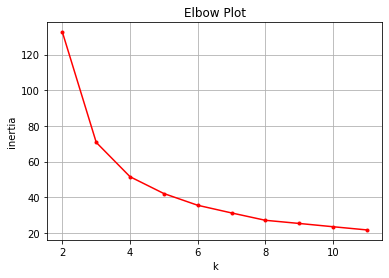

In [ ]:
# plot Elbow curve 
plt.plot(range(2,k_max),inertias,color='red',marker='.')
plt.grid(),plt.xlabel('k'),plt.ylabel('inertia'),plt.title('Elbow Plot')
plt.show()                                    # make plot show

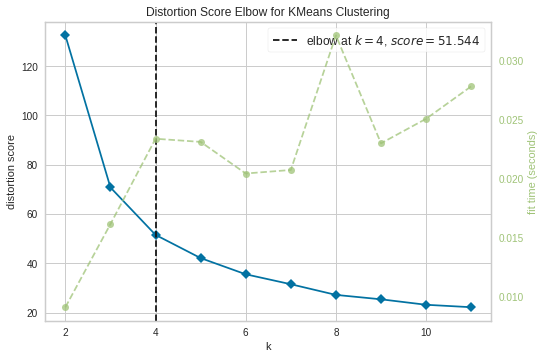

In [ ]:
# load model 
from sklearn.cluster import KMeans
# using KElbowVisualizer - https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(2,k_max))
visualizer.fit(Xtrain)                        # Fit the data to the visualizer
visualizer.show()                             # Finalize and render the figure

In [ ]:
# data source - https://drive.google.com/file/d/1cFEseuXjoHudu-YJNlLf5OeEe_U_mjXM/view?usp=share_link
!gdown 1cFEseuXjoHudu-YJNlLf5OeEe_U_mjXM

Downloading...
From: https://drive.google.com/uc?id=1cFEseuXjoHudu-YJNlLf5OeEe_U_mjXM
To: /content/predatory_pricing_raw.csv
100% 398k/398k [00:00<00:00, 151MB/s]


In [ ]:
# load data 
